In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Computing in Carbon

## Modeling Neurons

- looking at a single neuron

- neuroelectronics: membranes, ion channels, wiring 
- neuron excitability 
- dendrite computing...

Equivalent circuit model: convert the neuron to a electric circuit ...

- the lipid bilayer acts as capictor...


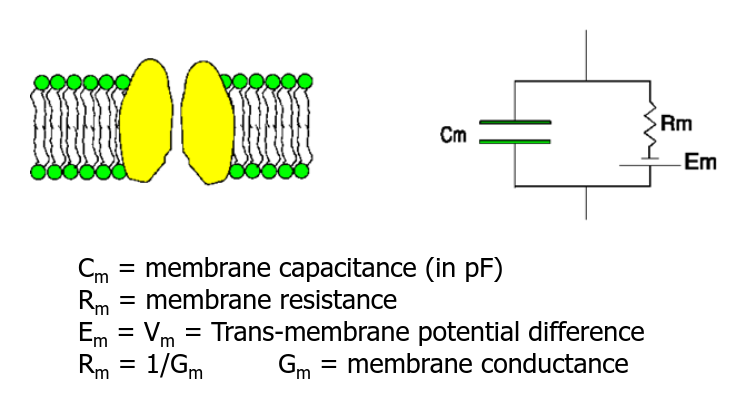

In [2]:
Image(filename= "elcircuit.png", width=400)

from Kirchoeff's law

$I_R + T_C + I_{ext} = 0$

from Ohm's law

$I_R = V/R$

$C = Q/V$ where $Q$ is the charge

take the derivative of this equation

$I_C = C \frac{dV}{dt}$

by substitution in Kirchoeff's law

$I_R + C \frac{dV}{dt} + I_{ext} = 0$

$C \frac{dV}{dt} = - I_R +  I_{ext}$

$C \frac{dV}{dt} = - \frac{V- V_R}{R} +  I_{ext}$


In the cell, there is equilibrium potentials ...

Ernest's potential

$E = \frac{k_B T}{zq} \ln \frac{inside}{outside}$

$k_B$ boltzman const

$T$ temprature

$q$ ionic charge

$z$ number of charges

resistor = ion channels & capacitor = lipid bilayer & battery = ion gradient
ions channels: many types 
    
- ca channels
- voltage dependents
- heat senstive ... etc

## References:

https://www.coursera.org/learn/computational-neuroscience

https://slideplayer.com/slide/8169060/
